###  series는 열이 하나

In [1]:
import pandas as pd
import numpy as np 

In [2]:
pandas_series = pd.Series([3000, 3200, 2700],
                index = ['2016-11-10', '2016-11-11', '2016-11-12'])

In [3]:
print(type(pandas_series))

<class 'pandas.core.series.Series'>


In [4]:
pandas_series

2016-11-10    3000
2016-11-11    3200
2016-11-12    2700
dtype: int64

In [6]:
pandas_series[1:]

2016-11-11    3200
2016-11-12    2700
dtype: int64

### Data Frame은 열이 여러 개

In [10]:
df = pd.DataFrame([100, 150, 200, 250, 300], columns = ['numbers'], 
                 index = ['a', 'b', 'c', 'd', 'e'])

In [11]:
df

,numbers
a,100
b,150
c,200
d,250
e,300


In [12]:
df.index 

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [13]:
df.columns

Index(['numbers'], dtype='object')

In [14]:
df.loc['c'] # 명칭 기반

numbers    200
Name: c, dtype: int64

In [18]:
df.iloc[2] # 위치 기반

numbers    200
Name: c, dtype: int64

#### 과제

In [16]:
a = [200, 300, 200, 500, 400, 300, 300]

In [17]:
print(a.count(300))

3


### week 3

In [20]:
df.sum()

numbers    1000
dtype: int64

In [21]:
df.numbers**2

a    10000
b    22500
c    40000
d    62500
e    90000
Name: numbers, dtype: int64

In [22]:
df['values'] = (10, 50, 40, 30, 60) # 기존 컬럼 개수와 같아야 한다

In [23]:
df

,numbers,values
a,100,10
b,150,50
c,200,40
d,250,30
e,300,60


In [25]:
df['values'] = pd.DataFrame(['Fourth', 'Second', 'First', 'Fifth', 'Third'],
                           index = ['d', 'b', 'a', 'e', 'c']) # 순서는 자동 정렬된다.
df

In [27]:
del df['values']
df

,numbers
a,100
b,150
c,200
d,250
e,300


#### 데이터 개수 일치 시키기

In [28]:
df['values'] = (10, 50, 40) # 개수 맞지 않는 경우 -> error
df

ValueError: Length of values (3) does not match length of index (5)

In [32]:
df_1 = pd.DataFrame(['1', '2', '3'], columns = ['A'])

df_2 = pd.DataFrame(['4', '5', '6', '7'], columns = ['B'])

df = df_1.join(df_2, how = 'outer') # 두 개의 df를 outer join으로 합침
df

,A,B
0,1,4
1,2,5
2,3,6
3,NaN,7


In [35]:
# 난수 (numpy의 random 함수)
df = pd.DataFrame(np.random.randn(5,5))
df.columns=['A', 'B', 'C', 'D', 'E']

df

,A,B,C,D,E
0,-1.996010,-0.993990,0.033719,1.639267,0.203125
1,-0.126555,-0.239282,0.987139,0.467473,2.126756
2,-0.061583,-0.117074,-0.713970,0.319429,-0.897504
3,-0.102282,-0.634572,-0.034360,-0.119537,-0.856998
4,0.220202,0.088817,-1.099309,-0.634375,0.532724


In [40]:
# 최대, 최소, 누적합 등
df.max()

A    0.220202
B    0.088817
C    0.987139
D    1.639267
E    2.126756
dtype: float64

In [39]:
df.min()

A   -1.996010
B   -0.993990
C   -1.099309
D   -0.634375
E   -0.897504
dtype: float64

In [41]:
df.mean()

A   -0.413246
B   -0.379220
C   -0.165356
D    0.334451
E    0.221621
dtype: float64

In [42]:
df.std()

A    0.895678
B    0.433160
C    0.799731
D    0.846344
E    1.239206
dtype: float64

In [43]:
df.cumsum()

,A,B,C,D,E
0,-1.996010,-0.993990,0.033719,1.639267,0.203125
1,-2.122565,-1.233272,1.020858,2.106740,2.329881
2,-2.184148,-1.350346,0.306889,2.426169,1.432377
3,-2.286430,-1.984918,0.272529,2.306632,0.575380
4,-2.066229,-1.896101,-0.826780,1.672257,1.108104


In [44]:
df.describe() # 통계적 분포를 한 번에

,A,B,C,D,E
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-0.413246,-0.379220,-0.165356,0.334451,0.221621
std,0.895678,0.433160,0.799731,0.846344,1.239206
min,-1.996010,-0.993990,-1.099309,-0.634375,-0.897504
25%,-0.126555,-0.634572,-0.713970,-0.119537,-0.856998
50%,-0.102282,-0.239282,-0.034360,0.319429,0.203125
75%,-0.061583,-0.117074,0.033719,0.467473,0.532724
max,0.220202,0.088817,0.987139,1.639267,2.126756


In [45]:
df['division'] = ['X', 'Y', 'X', 'Y', 'Z']
df

,A,B,C,D,E,division
0,-1.996010,-0.993990,0.033719,1.639267,0.203125,X
1,-0.126555,-0.239282,0.987139,0.467473,2.126756,Y
2,-0.061583,-0.117074,-0.713970,0.319429,-0.897504,X
3,-0.102282,-0.634572,-0.034360,-0.119537,-0.856998,Y
4,0.220202,0.088817,-1.099309,-0.634375,0.532724,Z


In [46]:
df.groupby(['division']).mean() # 그룹별 평균

,A,B,C,D,E
division,,,,,
X,-1.028797,-0.555532,-0.340125,0.979348,-0.347189
Y,-0.114418,-0.436927,0.476389,0.173968,0.634879
Z,0.220202,0.088817,-1.099309,-0.634375,0.532724


In [47]:
df.groupby(['division']).mean()

,A,B,C,D,E
division,,,,,
X,-1.028797,-0.555532,-0.340125,0.979348,-0.347189
Y,-0.114418,-0.436927,0.476389,0.173968,0.634879
Z,0.220202,0.088817,-1.099309,-0.634375,0.532724


## matplotlib

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [52]:
value = np.random.standard_normal(40) # 표준정규분포를 따르는 난수 40개 생성
value

array([-0.88607132, -0.65383647,  0.36327288,  0.27383069, -1.66343886,
       -0.45285473,  1.22339283, -0.27538522,  0.23920149, -0.95248616,
       -0.5991238 , -0.16829765,  0.66226816, -0.15374108,  0.91185101,
        0.02833163,  0.28278995,  0.17289851, -0.83773171,  1.87504322,
       -2.30588156, -0.28016328, -0.12814899,  0.5658218 ,  0.47738485,
       -0.72163958, -0.63688593,  3.3623936 ,  0.16794577, -0.6849993 ,
        0.52853591, -0.06742107,  1.00011211, -1.06207557, -0.54462829,
        1.01926905, -1.80763716, -0.63088081, -0.61204815, -0.60065161])

(-3.3058815647246043, 4.362393604502703)

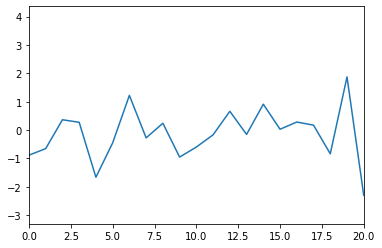

In [53]:
index = range(len(value))
plt.plot(index, value) # marker 설정

# x,y axis range setting
plt.xlim(0, 20)
plt.ylim(np.min(value)-1, np.max(value) + 1)

Text(0.5, 1.0, 'Line Plot 1')

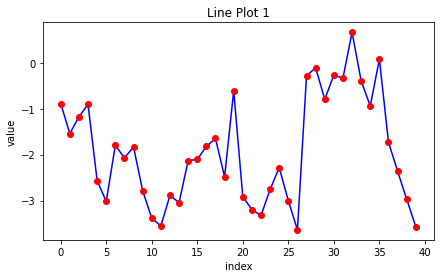

In [54]:
plt.figure(figsize=(7,4)) # size set
plt.plot(value.cumsum(), 'b', lw=1.5) # blue
plt.plot(value.cumsum(), 'ro') # ro: 빨간색 동그라미
# 그림 두 개를 그려서 겹치는 것

plt.xlabel('index')
plt.ylabel('value')
plt.title("Line Plot 1")

In [55]:
value = np.random.standard_normal((30,2))
value

array([[ 0.67283207, -0.87893669],
       [-0.15447463, -0.2352415 ],
       [-0.21281148, -1.49832892],
       [-0.229162  , -0.72241447],
       [-1.56307368,  1.05519803],
       [-1.10369145,  1.03263522],
       [-0.20140242, -0.98502624],
       [ 0.27219674, -1.71833333],
       [-0.33344733, -0.17644748],
       [ 0.45059217, -2.05579944],
       [-0.78042355, -0.05012571],
       [ 0.60609874,  0.38083302],
       [-0.04530758, -0.00900489],
       [ 0.4199918 , -1.49337835],
       [-0.71472353, -0.14186697],
       [-0.05166595, -2.32520497],
       [ 0.35352953, -1.60456727],
       [-0.32589847,  1.04478216],
       [ 1.19330832, -2.02406036],
       [-0.06519706, -1.07014093],
       [ 1.61660301, -1.13582117],
       [-1.16489326,  0.7052685 ],
       [-0.72662067,  0.0872862 ],
       [-1.65327243, -0.16572336],
       [ 1.49769737,  0.06301764],
       [ 0.39296461, -1.2570363 ],
       [-0.15351722, -0.77510836],
       [ 0.92942098, -0.28156702],
       [-0.53619421,

Text(0.5, 1.0, 'Line Plot 2')

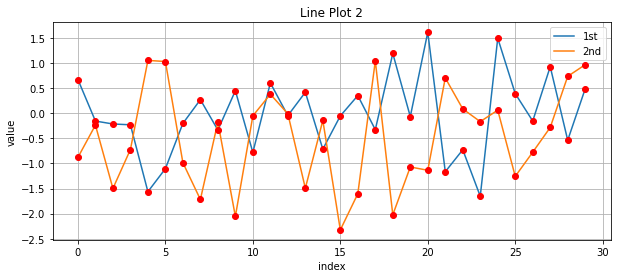

In [56]:
# 두 데이터 그래프 동시에
plt.figure(figsize=(10, 4))
plt.plot(value[:,0], lw=1.5, label='1st')
plt.plot(value[:,1], lw=1.5, label='2nd')
plt.plot(value, 'ro')
plt.grid(True)
plt.legend(loc=0) # 범례
plt.xlabel('index')
plt.ylabel('value')
plt.title("Line Plot 2")

Text(0, 0.5, 'value')

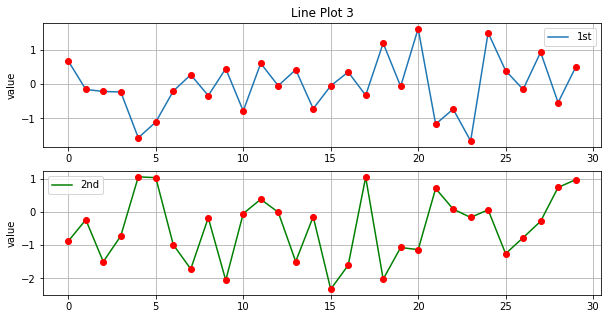

In [58]:
# 두 데이터 그래프를 각각 : pyplot.subplot
plt.figure(figsize=(10, 5))
plt.subplot(211) # 2x1개로 이루어진 서브플롯 중 첫 번째 서브플롯 ex) 2X3에서 그릴 거면 subplot(231)
plt.plot(value[:,0], lw=1.5, label='1st')
plt.plot(value[:,0], 'ro')
plt.grid(True)
plt.legend(loc=0) # 범례
plt.ylabel('value')
plt.title("Line Plot 3")

plt.subplot(212) # 2x1개로 이루어진 서브플롯 중 첫 번째 서브플롯
plt.plot(value[:,1], 'g', lw=1.5, label='2nd')
plt.plot(value[:,1], 'ro')
plt.grid(True)
plt.legend(loc=0) # 범례
plt.axis('tight')
plt.ylabel('value')

## 산점도

Text(0.5, 1.0, 'Scatter Plot 1')

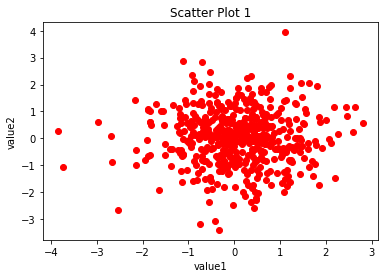

In [63]:
value = np.random.standard_normal((500,2)) # 표준정규분포를 따르는 난수 500개를 2행으로 할당
plt.plot(value[:,0], value[:,1], 'ro')
plt.grid(False)
plt.xlabel('value1')
plt.ylabel('value2')
plt.title('Scatter Plot 1')

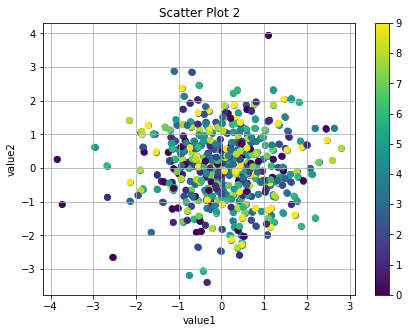

In [67]:
## plt.scatter를 이용하여 그리기
plt.figure(figsize=(7,5))
plt.scatter(value[:,0], value[:,1], marker='o')
plt.grid(True)
plt.xlabel('value1')
plt.ylabel('value2')
plt.title("Scatter Plot 2")

# 산점도에 색깔 입히기
color = np.random.randint(0,10,len(value)) # 0부터 10 사이의 값을 value 값 개수만큼 저장
plt.scatter(value[:,0], value[:,1], c=color, marker='o')
plt.colorbar()

## 3.3

Text(0.5, 1.0, 'Histogram 1')

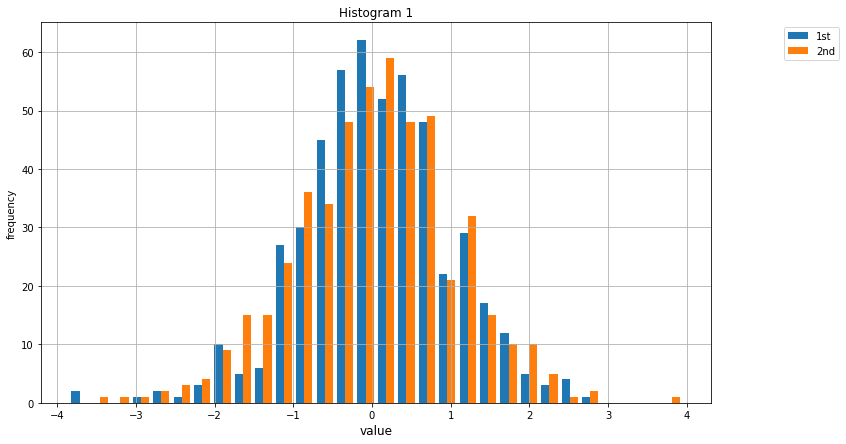

In [75]:
plt.figure(figsize=(12, 7))
plt.hist(value, label=('1st', '2nd'), bins=30) # 데이터를 구간으로 나누는 개수 # color=('yellow', 'green')과 같이 색상 옵션 추가도 가능
plt.grid('True')
plt.legend(bbox_to_anchor = (1.2, 1), loc="upper right") # b_t_a: 라벨의 상대적 위치를 결정 x축 방향으로 1.2, y축 방향으로 1.0만큼 이동
plt.xlabel('value', size=12)
plt.ylabel('frequency')
plt.title('Histogram 1')

1.bins: [-3.32015262 -3.10556549 -2.89097837 -2.67639124 -2.46180411 -2.24721698
 -2.03262985 -1.81804273 -1.6034556  -1.38886847 -1.17428134 -0.95969422
 -0.74510709 -0.53051996 -0.31593283 -0.1013457   0.11324142  0.32782855
  0.54241568  0.75700281  0.97158994  1.18617706  1.40076419  1.61535132
  1.82993845  2.04452558  2.2591127   2.47369983  2.68828696  2.90287409
  3.11746121]
2.the length of bins: 31
3.bins_centers: [-2.72250386 -2.53712609 -2.35174832 -2.16637055 -1.98099278 -1.79561501
 -1.61023724 -1.42485947 -1.2394817  -1.05410393 -0.86872616 -0.68334839
 -0.49797062 -0.31259285 -0.12721508  0.05816269  0.24354046  0.42891823
  0.614296    0.79967377  0.98505154  1.1704293   1.35580707  1.54118484
  1.72656261  1.91194038  2.09731815  2.28269592  2.46807369  2.65345146]
4.col:  [-0.09121266 -0.05129657 -0.01138048  0.02853561  0.06845171  0.1083678
  0.14828389  0.18819998  0.22811607  0.26803217  0.30794826  0.34786435
  0.38778044  0.42769653  0.46761263  0.50752872  0.5

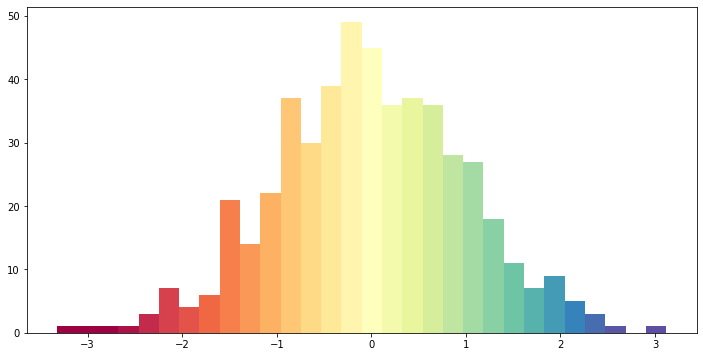

In [83]:
# 각각 다른 색을 입히기
value = np.random.standard_normal(500)
cm = plt.cm.get_cmap('Spectral')
plt.figure(figsize=(12, 6))

n, bins, patches = plt.hist(value, bins=30, color='green')
print("1.bins: " + str(bins))
print("2.the length of bins: " + str(len(bins)))

bins_centers = 0.5*(bins[:-1] + bins[1:])
print("3.bins_centers: " + str(bin_centers))


# scale values to interval[0,1] : 정규화
col = (bins_centers - min(bin_centers)) / (max(bin_centers) - min(bin_centers)) # (현재값 - 최솟값) / (최댓값 - 최솟값)
print("4.col:  " + str(col))

for c,p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

## Seaborn

In [89]:
import seaborn as sns

data2 = sns.load_dataset("flights")
print(data2)

     year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]


In [90]:
pv_d = data2.pivot("year", "month", "passengers") # 피벗하여 재구성
pv_d

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='month', ylabel='year'>

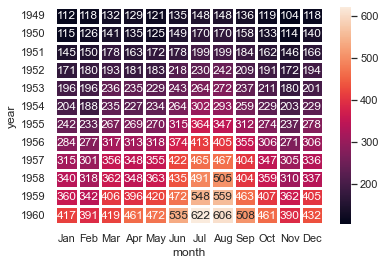

In [111]:
sns.set(context="poster", font = "monospace")
sns.set()
sns.heatmap(pv_d, annot=True, fmt="d", linewidth=3) # annot: 데이터 각 셀 값 표시여부, fmt="d": 10진수



<AxesSubplot:xlabel='month', ylabel='year'>

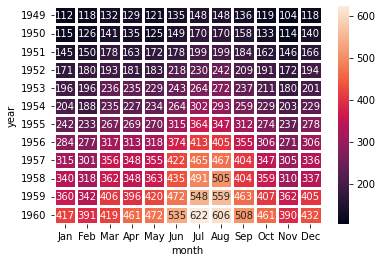

In [95]:
sns.set()
sns.reset_orig() # parmas 리셋
sns.heatmap(pv_d, annot=True, fmt="d", linewidth=3)

In [108]:
## Pandas 데이터 시각화
import pandas as pd
from pandas import scatter_matrix # 산점도 매트릭스 오류 뜨네 from pandas.plotting import scatter_matrix

ModuleNotFoundError: No module named 'pd'

In [104]:
value = np.random.randn(500, 4)
df = pd.DataFrame(value, columns = ['value 1','value 2','value 3','value 4'])
df


Scatter_matrix(df, alpha=0.2, figsize=(6,6), diagonal='hist') # alpha: 투명도 설정, diagonal: 시각화 설정

NameError: name 'Scatter_matrix' is not defined

## 3주차 과제

Text(0.5, 1.0, 'Second')

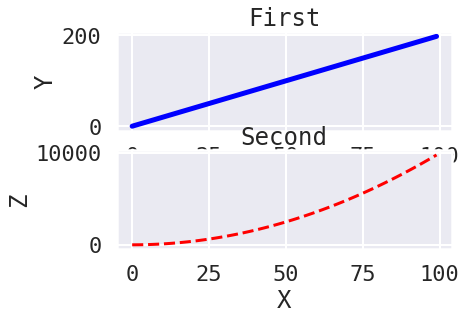

In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
x = np.arange(0, 100)
y = x * 2
z = x ** 2
plt.subplot(211)
plt.plot(x,y,color ="blue", lw=  5)
plt.xlabel("X")
plt.ylabel("Y")
plt. title("First")

plt.subplot(212)
plt.plot(x,z,color="red", lw=3, ls="--")
plt.xlabel("X")
plt.ylabel("Z")
plt.title("Second")